## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [309]:
import pandas as pd
import psycopg2
import sqlalchemy
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine
from scipy import stats
import seaborn as sns

In [307]:
POSTGRES_ADDRESS = 'mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com' 
POSTGRES_PORT = '5432' 
POSTGRES_USERNAME = 'lhl_student' 
POSTGRES_PASSWORD = 'lhl_student' 
POSTGRES_DBNAME='mid_term_project'
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=POSTGRES_USERNAME, 
                                                                                        password=POSTGRES_PASSWORD, 
                                                                                        ipaddress=POSTGRES_ADDRESS, 
                                                                                        port=POSTGRES_PORT, 
                                                                                        dbname=POSTGRES_DBNAME)) 
# Create the connection 
cnx = create_engine(postgres_str)

In [318]:
df_flight=pd.read_sql_query('''SELECT * FROM flights LIMIT 10000;''', cnx)

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [325]:
df_flight.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-10-01,UA,UA_CODESHARE,UA,6312,YV,N88331,6312,11278,DCA,...,1208.0,20.0,0.0,0.0,0.0,0.0,None,NaN,NaN,None
1,2019-10-01,UA,UA_CODESHARE,UA,6248,YV,N521LR,6248,12264,IAD,...,299.0,20.0,0.0,0.0,0.0,0.0,None,NaN,NaN,None
2,2019-10-01,UA,UA_CODESHARE,UA,6186,YV,N87345,6186,12266,IAH,...,781.0,18.0,0.0,0.0,0.0,0.0,2126.0,17.0,17.0,None
3,2019-10-01,UA,UA_CODESHARE,UA,6253,YV,N85358,6253,12266,IAH,...,788.0,16.0,0.0,0.0,0.0,0.0,None,NaN,NaN,None
4,2019-10-01,AA,AA_CODESHARE,AA,5710,YV,N912FJ,5710,14107,PHX,...,160.0,0.0,0.0,7.0,0.0,22.0,None,NaN,NaN,None


In [326]:
df_flight.isnull().sum()

fl_date                    0
mkt_unique_carrier         0
branded_code_share         0
mkt_carrier                0
mkt_carrier_fl_num         0
op_unique_carrier          0
tail_num                   4
op_carrier_fl_num          0
origin_airport_id          0
origin                     0
origin_city_name           0
dest_airport_id            0
dest                       0
dest_city_name             0
crs_dep_time               0
dep_time                  28
dep_delay                 28
taxi_out                  30
wheels_off                30
wheels_on                 32
taxi_in                   32
crs_arr_time               0
arr_time                  32
arr_delay                 42
cancelled                  0
cancellation_code       9969
diverted                   0
dup                        0
crs_elapsed_time           0
actual_elapsed_time       42
air_time                  42
flights                    0
distance                   0
carrier_delay              0
weather_delay 

In [327]:
carr_delay_mean=df_flight['carrier_delay'].astype('float').mean(axis=0)
wea_delay_mean=df_flight['weather_delay'].astype('float').mean(axis=0)
nas_delay_mean=df_flight['nas_delay'].astype('float').mean(axis=0)
sec_delay_mean=df_flight['security_delay'].astype('float').mean(axis=0)
aircraft_delay_mean=df_flight['late_aircraft_delay'].astype('float').mean(axis=0)

In [328]:
df_flight['carrier_delay'].replace(np.nan, carr_delay_mean, inplace=True)
df_flight['weather_delay'].replace(np.nan, wea_delay_mean, inplace=True)
df_flight['nas_delay'].replace(np.nan, nas_delay_mean, inplace=True)
df_flight['security_delay'].replace(np.nan, sec_delay_mean, inplace=True)
df_flight['late_aircraft_delay'].replace(np.nan, aircraft_delay_mean, inplace=True)

In [329]:
df_flight.isnull().sum()

fl_date                    0
mkt_unique_carrier         0
branded_code_share         0
mkt_carrier                0
mkt_carrier_fl_num         0
op_unique_carrier          0
tail_num                   4
op_carrier_fl_num          0
origin_airport_id          0
origin                     0
origin_city_name           0
dest_airport_id            0
dest                       0
dest_city_name             0
crs_dep_time               0
dep_time                  28
dep_delay                 28
taxi_out                  30
wheels_off                30
wheels_on                 32
taxi_in                   32
crs_arr_time               0
arr_time                  32
arr_delay                 42
cancelled                  0
cancellation_code       9969
diverted                   0
dup                        0
crs_elapsed_time           0
actual_elapsed_time       42
air_time                  42
flights                    0
distance                   0
carrier_delay              0
weather_delay 

In [330]:
df_flight=df_flight.drop(['first_dep_time', 'total_add_gtime', 'longest_add_gtime', 'no_name', 'cancellation_code'], axis=1)

In [331]:
df_flight.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019-10-01,UA,UA_CODESHARE,UA,6312,YV,N88331,6312,11278,DCA,...,207.0,174.0,154.0,1.0,1208.0,20.0,0.0,0.0,0.0,0.0
1,2019-10-01,UA,UA_CODESHARE,UA,6248,YV,N521LR,6248,12264,IAD,...,79.0,72.0,49.0,1.0,299.0,20.0,0.0,0.0,0.0,0.0
2,2019-10-01,UA,UA_CODESHARE,UA,6186,YV,N87345,6186,12266,IAH,...,133.0,114.0,97.0,1.0,781.0,18.0,0.0,0.0,0.0,0.0
3,2019-10-01,UA,UA_CODESHARE,UA,6253,YV,N85358,6253,12266,IAH,...,141.0,126.0,107.0,1.0,788.0,16.0,0.0,0.0,0.0,0.0
4,2019-10-01,AA,AA_CODESHARE,AA,5710,YV,N912FJ,5710,14107,PHX,...,57.0,64.0,33.0,1.0,160.0,0.0,0.0,7.0,0.0,22.0


In [332]:
df_flight.tail()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
9995,2019-10-02,DL,DL_CODESHARE,DL,5198,9E,N314PQ,5198,11433,DTW,...,69.0,71.0,40.0,1.0,229.0,37.000000,0.000000,2.000000,0.0,0.000000
9996,2019-10-02,DL,DL_CODESHARE,DL,5199,9E,N901XJ,5199,10397,ATL,...,147.0,149.0,121.0,1.0,841.0,20.202523,0.634198,17.229152,0.0,24.613875
9997,2019-10-02,DL,DL_CODESHARE,DL,5200,9E,N136EV,5200,12478,JFK,...,116.0,88.0,56.0,1.0,340.0,20.202523,0.634198,17.229152,0.0,24.613875
9998,2019-10-02,DL,DL_CODESHARE,DL,5200,9E,N136EV,5200,14122,PIT,...,102.0,111.0,65.0,1.0,340.0,20.202523,0.634198,17.229152,0.0,24.613875
9999,2019-10-02,DL,DL_CODESHARE,DL,5203,9E,N131EV,5203,11298,DFW,...,226.0,203.0,183.0,1.0,1391.0,20.202523,0.634198,17.229152,0.0,24.613875


In [333]:
df_flight.isnull().sum()

fl_date                 0
mkt_unique_carrier      0
branded_code_share      0
mkt_carrier             0
mkt_carrier_fl_num      0
op_unique_carrier       0
tail_num                4
op_carrier_fl_num       0
origin_airport_id       0
origin                  0
origin_city_name        0
dest_airport_id         0
dest                    0
dest_city_name          0
crs_dep_time            0
dep_time               28
dep_delay              28
taxi_out               30
wheels_off             30
wheels_on              32
taxi_in                32
crs_arr_time            0
arr_time               32
arr_delay              42
cancelled               0
diverted                0
dup                     0
crs_elapsed_time        0
actual_elapsed_time    42
air_time               42
flights                 0
distance                0
carrier_delay           0
weather_delay           0
nas_delay               0
security_delay          0
late_aircraft_delay     0
dtype: int64

In [334]:
df_flight=df_flight.dropna()
df_flight.isnull().sum()

fl_date                0
mkt_unique_carrier     0
branded_code_share     0
mkt_carrier            0
mkt_carrier_fl_num     0
op_unique_carrier      0
tail_num               0
op_carrier_fl_num      0
origin_airport_id      0
origin                 0
origin_city_name       0
dest_airport_id        0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               0
wheels_off             0
wheels_on              0
taxi_in                0
crs_arr_time           0
arr_time               0
arr_delay              0
cancelled              0
diverted               0
dup                    0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
flights                0
distance               0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [335]:
df_flights=df_flight.copy(deep=True)

In [175]:
data=df_flights['dep_delay']
data.head()

0    16.0
1    35.0
2     8.0
3    -3.0
4    -8.0
Name: dep_delay, dtype: float64

In [176]:
stats.shapiro(data)

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.30885374546051025, pvalue=0.0)

#### the p-value is less than alpha. so the null hypothesis is not accepted.

(-300.0, 300.0)

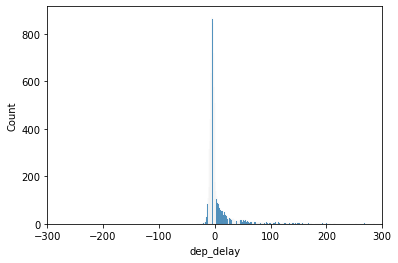

In [177]:
sns.histplot(data)
plt.xlim(-300, 300)

#### the departue delay is not normally distributed. 

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [178]:
import datetime as dt
import datetime as date
import datetime as time

In [179]:
df_flights['fl_date']=pd.to_datetime(df_flights['fl_date'])
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-08-30,AA,AA_CODESHARE,AA,4251,AX,N613AE,4251,11278,DCA,...,83.0,81.0,52.0,1.0,313.0,20.95765,4.298497,12.370219,0.105874,27.217896
1,2018-08-30,AA,AA_CODESHARE,AA,4252,AX,N607AE,4252,10581,BGR,...,121.0,118.0,90.0,1.0,590.0,32.00000,0.000000,0.000000,0.000000,0.000000
2,2018-08-30,AA,AA_CODESHARE,AA,4253,AX,N607AE,4253,10868,CAE,...,90.0,99.0,84.0,1.0,408.0,0.00000,0.000000,9.000000,0.000000,8.000000
3,2018-08-30,AA,AA_CODESHARE,AA,4253,AX,N607AE,4253,11278,DCA,...,99.0,122.0,82.0,1.0,408.0,0.00000,0.000000,20.000000,0.000000,0.000000
4,2018-08-30,DL,DL_CODESHARE,DL,3379,9E,N916XJ,3379,11973,GPT,...,87.0,83.0,55.0,1.0,352.0,20.95765,4.298497,12.370219,0.105874,27.217896


In [180]:
df_flights.tail()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
9995,2018-08-31,AS,AS,AS,371,AS,N270AK,371,13796,OAK,...,122.0,117.0,96.0,1.0,672.0,20.95765,4.298497,12.370219,0.105874,27.217896
9996,2018-08-31,AS,AS,AS,374,AS,N493AS,374,14747,SEA,...,120.0,104.0,76.0,1.0,605.0,20.95765,4.298497,12.370219,0.105874,27.217896
9997,2018-08-31,AS,AS,AS,377,AS,N556AS,377,10821,BWI,...,321.0,312.0,297.0,1.0,2295.0,20.95765,4.298497,12.370219,0.105874,27.217896
9998,2018-08-31,AS,AS,AS,378,AS,N584AS,378,14679,SAN,...,297.0,317.0,268.0,1.0,2295.0,0.00000,0.000000,17.000000,0.000000,0.000000
9999,2018-08-31,AS,AS,AS,379,AS,N607AS,379,14747,SEA,...,142.0,114.0,96.0,1.0,672.0,20.95765,4.298497,12.370219,0.105874,27.217896


In [181]:
df_flights['month']=df_flights['fl_date'].dt.month

In [182]:
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,month
0,2018-08-30,AA,AA_CODESHARE,AA,4251,AX,N613AE,4251,11278,DCA,...,81.0,52.0,1.0,313.0,20.95765,4.298497,12.370219,0.105874,27.217896,8
1,2018-08-30,AA,AA_CODESHARE,AA,4252,AX,N607AE,4252,10581,BGR,...,118.0,90.0,1.0,590.0,32.00000,0.000000,0.000000,0.000000,0.000000,8
2,2018-08-30,AA,AA_CODESHARE,AA,4253,AX,N607AE,4253,10868,CAE,...,99.0,84.0,1.0,408.0,0.00000,0.000000,9.000000,0.000000,8.000000,8
3,2018-08-30,AA,AA_CODESHARE,AA,4253,AX,N607AE,4253,11278,DCA,...,122.0,82.0,1.0,408.0,0.00000,0.000000,20.000000,0.000000,0.000000,8
4,2018-08-30,DL,DL_CODESHARE,DL,3379,9E,N916XJ,3379,11973,GPT,...,83.0,55.0,1.0,352.0,20.95765,4.298497,12.370219,0.105874,27.217896,8


In [183]:
monthly_count=df_flights.groupby(['month'])['arr_delay'].count()
monthly_count

month
8    9903
Name: arr_delay, dtype: int64

In [184]:
monthly_count=pd.DataFrame(monthly_count)
monthly_count

,arr_delay
month,
8,9903


#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [209]:
features = [
 'fl_date',
 'mkt_carrier',
 'dep_delay',
 'taxi_out',
 'taxi_in',
 'crs_arr_time',
 'arr_time',
 'arr_delay',
 'crs_elapsed_time',
 'actual_elapsed_time',
 'air_time',
 'distance']
delays = df_flights[features]

In [210]:
delays.head()

,fl_date,mkt_carrier,dep_delay,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance
0,2018-08-30,AA,16.0,25.0,4.0,1303,1317.0,14.0,83.0,81.0,52.0,313.0
1,2018-08-30,AA,35.0,16.0,12.0,749,821.0,32.0,121.0,118.0,90.0,590.0
2,2018-08-30,AA,8.0,11.0,4.0,2116,2133.0,17.0,90.0,99.0,84.0,408.0
3,2018-08-30,AA,-3.0,37.0,3.0,1909,1929.0,20.0,99.0,122.0,82.0,408.0
4,2018-08-30,DL,-8.0,19.0,9.0,1614,1602.0,-12.0,87.0,83.0,55.0,352.0


In [211]:
delays['delays_sum']=delays['arr_delay']+delays['dep_delay']
delays['make_up_times']=''
for i in delays.index:
    if delays._get_value(i, 'dep_delay')>0:
        if delays._get_value(i, 'dep_delay')<=delays._get_value(i, 'arr_delay'):
            delays._set_value(i, 'make_up_times', 'no')
        
        else:
            delays._set_value(i, 'make_up_times', 'yes')
    else:
        delays._set_value(i, 'make_up_times', 'no departure delay')


<ipython-input-211-5286996c2e03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delays['delays_sum']=delays['arr_delay']+delays['dep_delay']
<ipython-input-211-5286996c2e03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delays['make_up_times']=''


In [212]:
delays.head()

,fl_date,mkt_carrier,dep_delay,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,delays_sum,make_up_times
0,2018-08-30,AA,16.0,25.0,4.0,1303,1317.0,14.0,83.0,81.0,52.0,313.0,30.0,yes
1,2018-08-30,AA,35.0,16.0,12.0,749,821.0,32.0,121.0,118.0,90.0,590.0,67.0,yes
2,2018-08-30,AA,8.0,11.0,4.0,2116,2133.0,17.0,90.0,99.0,84.0,408.0,25.0,no
3,2018-08-30,AA,-3.0,37.0,3.0,1909,1929.0,20.0,99.0,122.0,82.0,408.0,17.0,no departure delay
4,2018-08-30,DL,-8.0,19.0,9.0,1614,1602.0,-12.0,87.0,83.0,55.0,352.0,-20.0,no departure delay


In [213]:
delays.groupby('mkt_carrier').count()

,fl_date,dep_delay,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,delays_sum,make_up_times
mkt_carrier,,,,,,,,,,,,,
AA,2495,2495,2495,2495,2495,2495,2495,2495,2495,2495,2495,2495,2495
AS,555,555,555,555,555,555,555,555,555,555,555,555,555
B6,244,244,244,244,244,244,244,244,244,244,244,244,244
DL,4188,4188,4188,4188,4188,4188,4188,4188,4188,4188,4188,4188,4188
G4,26,26,26,26,26,26,26,26,26,26,26,26,26
HA,167,167,167,167,167,167,167,167,167,167,167,167,167
NK,234,234,234,234,234,234,234,234,234,234,234,234,234
UA,1890,1890,1890,1890,1890,1890,1890,1890,1890,1890,1890,1890,1890
WN,104,104,104,104,104,104,104,104,104,104,104,104,104


In [214]:
delays['mkt_carrier'].unique()

array(['AA', 'DL', 'B6', 'AS', 'HA', 'UA', 'NK', 'WN', 'G4'], dtype=object)

In [223]:
# airlines that make up for delays

airline_dep_delays={'AA':[0,0,0], 'DL':[0,0,0], 'B6':[0,0,0], 'AS':[0,0,0], 'HA':[0,0,0], 'UA':[0,0,0], 'NK':[0,0,0], 'WN':[0,0,0], 'G4':[0,0,0]}

for i in delays.index:
    if delays._get_value(i, 'make_up_times')=='yes':
        airline_dep_delays[dfDelay._get_value(i,'mkt_carrier')][0] +=1
    
    elif delays._get_value(i, 'make_up_times')=='no':
        airline_dep_delays[dfDelay._get_value(i,'mkt_carrier')][1] +=1
    
    else: 
        airline_dep_delays[dfDelay._get_value(i,'mkt_carrier')][2] +=1
        
#k[0] is when dep_delay is greater than arrival delay but it is managed to arrive shorter delay than the departure
#k[1] is when there is a departure delay but the plane arrives with no delay to its destination.
for j, k in airline_dep_delays.items():
    print(f'{j} is able to make up for departure delay upto: {round(k[0]/(k[0]+k[1])*100)} % of the time') 

AA is able to make up for departure delay upto: 64 % of the time
DL is able to make up for departure delay upto: 81 % of the time
B6 is able to make up for departure delay upto: 77 % of the time
AS is able to make up for departure delay upto: 56 % of the time
HA is able to make up for departure delay upto: 75 % of the time
UA is able to make up for departure delay upto: 60 % of the time
NK is able to make up for departure delay upto: 81 % of the time
WN is able to make up for departure delay upto: 85 % of the time
G4 is able to make up for departure delay upto: 50 % of the time


In [226]:
# Finding the delays when departuring

# k[2] is when the plane leaves without delay

for j, k in airline_dep_delays.items():
    print(f'{j} gets delayed at departure upto: {round((k[0]+k[1])/(k[0]+k[1]+k[2])*100)} % of the time')

AA gets delayed at departure upto: 29 % of the time
DL gets delayed at departure upto: 23 % of the time
B6 gets delayed at departure upto: 30 % of the time
AS gets delayed at departure upto: 23 % of the time
HA gets delayed at departure upto: 7 % of the time
UA gets delayed at departure upto: 28 % of the time
NK gets delayed at departure upto: 29 % of the time
WN gets delayed at departure upto: 44 % of the time
G4 gets delayed at departure upto: 31 % of the time


#### **Task 6**: How many states cover 50% of US air traffic? 

In [337]:
df_task6=df_flights.copy(deep=True)

In [338]:
df_task6.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted', 'dup',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [339]:
#There is no column for for states, but we can use the columns for origin and destination cities
df_task6[['origin_city_name', 'dest_city_name']].head()

,origin_city_name,dest_city_name
0,"Washington, DC","Houston, TX"
1,"Washington, DC","Columbus, OH"
2,"Houston, TX","Omaha, NE"
3,"Houston, TX","Louisville, KY"
4,"Phoenix, AZ","Yuma, AZ"


In [340]:
#Spliting the codes from state's name
df_task6['origin_state']=df_task6['origin_city_name'].apply(lambda x: x.split(', ')[1])
df_task6['destination_state']=df_task6['dest_city_name'].apply(lambda x: x.split(', ')[1])
df_task6.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,origin_state,destination_state
0,2019-10-01,UA,UA_CODESHARE,UA,6312,YV,N88331,6312,11278,DCA,...,154.0,1.0,1208.0,20.0,0.0,0.0,0.0,0.0,DC,TX
1,2019-10-01,UA,UA_CODESHARE,UA,6248,YV,N521LR,6248,12264,IAD,...,49.0,1.0,299.0,20.0,0.0,0.0,0.0,0.0,DC,OH
2,2019-10-01,UA,UA_CODESHARE,UA,6186,YV,N87345,6186,12266,IAH,...,97.0,1.0,781.0,18.0,0.0,0.0,0.0,0.0,TX,NE
3,2019-10-01,UA,UA_CODESHARE,UA,6253,YV,N85358,6253,12266,IAH,...,107.0,1.0,788.0,16.0,0.0,0.0,0.0,0.0,TX,KY
4,2019-10-01,AA,AA_CODESHARE,AA,5710,YV,N912FJ,5710,14107,PHX,...,33.0,1.0,160.0,0.0,0.0,7.0,0.0,22.0,AZ,AZ


In [341]:
# counting the number of flights based on origin and destination
flights_per_state_origin=df_task6.groupby('origin_state')['fl_date'].count().sort_values(ascending=False)
flights_per_state_destination=df_task6.groupby('destination_state')['fl_date'].count().sort_values(ascending=False)

Text(0, 0.5, 'Origin State')

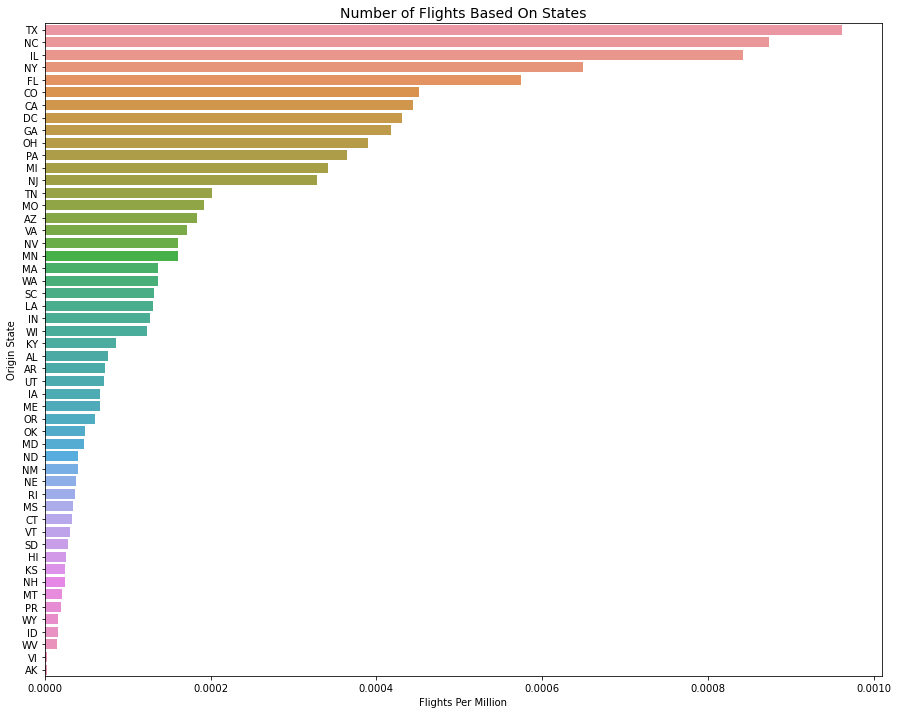

In [342]:
ax=plt.subplots(figsize=(15, 12))
million=1000000
ax=sns.barplot(x=flights_per_state_origin.values/million, y=flights_per_state_origin.index)
ax.set_title('Number of Flights Based On States', fontsize=14)
ax.set_xlabel('Flights Per Million')
ax.set_ylabel('Origin State')




Text(0, 0.5, 'Destination State')

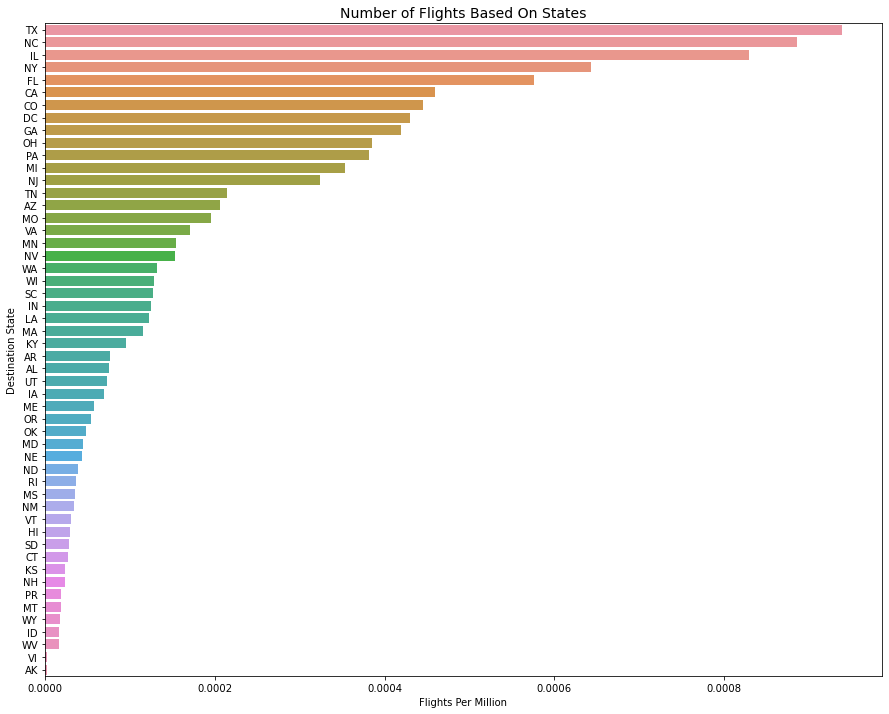

In [343]:
ax=plt.subplots(figsize=(15, 12))
million=1000000
ax=sns.barplot(x=flights_per_state_destination/million, y=flights_per_state_destination.index)
ax.set_title('Number of Flights Based On States', fontsize=14)
ax.set_xlabel('Flights Per Million')
ax.set_ylabel('Destination State')

In [344]:
#Counting the top states with most air traffic in the US
total_flights=flights_per_state_origin + flights_per_state_destination
flight_perc=total_flights.sum()*0.5
states=[]
total=0
num=False

In [345]:
for state, number in total_flights.sort_values(ascending=False).items():
    if total<=flight_perc:
        states.append(state)
        total +=number
        
    if total > flight_perc:
        num =True
    
    elif num == True:
        break

print('States that cover 50% of US Air Traffic:')
for state in states:
    print(state)

States that cover 50% of US Air Traffic:
TX
NC
IL
NY
FL
CA
CO
DC


#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [415]:
df_task8=df_flights.copy(deep=True)
df_task8.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted', 'dup',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [416]:
df_task8.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019-10-01,UA,UA_CODESHARE,UA,6312,YV,N88331,6312,11278,DCA,...,207.0,174.0,154.0,1.0,1208.0,20.0,0.0,0.0,0.0,0.0
1,2019-10-01,UA,UA_CODESHARE,UA,6248,YV,N521LR,6248,12264,IAD,...,79.0,72.0,49.0,1.0,299.0,20.0,0.0,0.0,0.0,0.0
2,2019-10-01,UA,UA_CODESHARE,UA,6186,YV,N87345,6186,12266,IAH,...,133.0,114.0,97.0,1.0,781.0,18.0,0.0,0.0,0.0,0.0
3,2019-10-01,UA,UA_CODESHARE,UA,6253,YV,N85358,6253,12266,IAH,...,141.0,126.0,107.0,1.0,788.0,16.0,0.0,0.0,0.0,0.0
4,2019-10-01,AA,AA_CODESHARE,AA,5710,YV,N912FJ,5710,14107,PHX,...,57.0,64.0,33.0,1.0,160.0,0.0,0.0,7.0,0.0,22.0


In [417]:

#convert to datetime
def convert_time(x):
    if np.isnan(x):
        return '00:00'
    
    if x == 2400:
        return '23:59'   
    string = str(int(x))
    
    if len(string)< 4:
        for _ in range(4-len(string)):
            string = '0' + string
    
    return string[:2] + ':' + string[2:]

In [418]:
#get dep_hr again
df_task8['fl_date'] = pd.to_datetime(df_task8['fl_date'], format='%Y-%m-%d')

df_task8['dep_time'] = df_task8['dep_time'].apply(lambda x: convert_time(x))
df_task8['dep_time'] = pd.to_datetime(df_task8['dep_time'], format='%H:%M')
df_task8['dep_hr'] = df_task8['dep_time'].dt.hour

In [419]:
#short flights:30 mins to 3 hours
#medium flights: 3 hourst to 6 hours
#long flights: above 6 hours
short_flights=df_task8[df_task8['air_time']<=180]
medium_flights=df_task8[(df_task8['air_time']> 180) & (df_task8['air_time']<=360)]
long_flights=df_task8[df_task8['air_time']>=360]

In [420]:
short_time=short_flights.groupby(by=[short_flights['dep_hr']])['taxi_out'].count().sort_values(ascending=False)
med_time=medium_flights.groupby(by=[medium_flights['dep_hr']])['taxi_out'].count().sort_values(ascending=False)
long_time=long_flights.groupby(by=[long_flights['dep_hr']])['taxi_out'].count().sort_values(ascending=False)

Text(0, 0.5, 'Number of flights')

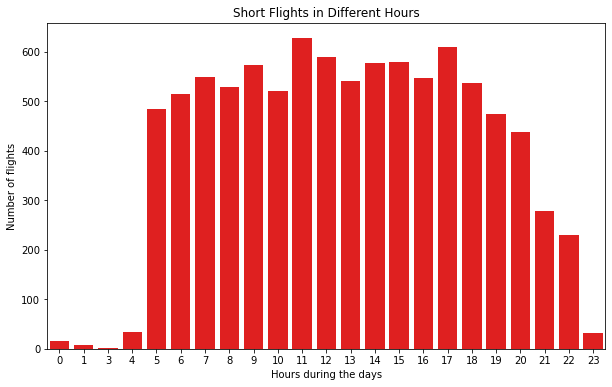

In [423]:
fig, ax=plt.subplots(figsize=(10, 6))

sns.barplot(ax=ax, x=short_time.index, y=short_time.values, color='r')
ax.set_title('Short Flights in Different Hours')
ax.set_xlabel('Hours during the days')
ax.set_ylabel('Number of flights')

Text(0, 0.5, 'Number of flights')

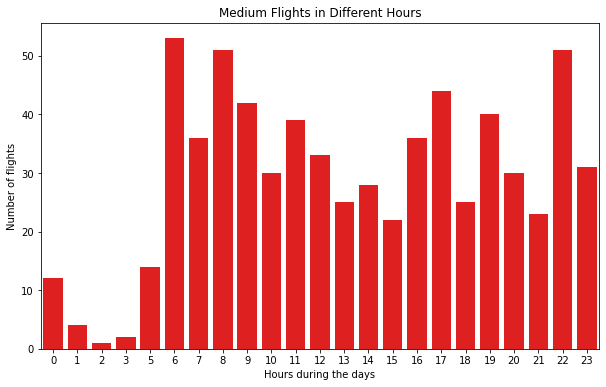

In [424]:
fig, ax=plt.subplots(figsize=(10, 6))

sns.barplot(ax=ax, x=med_time.index, y=med_time.values, color='r')
ax.set_title('Medium Flights in Different Hours')
ax.set_xlabel('Hours during the days')
ax.set_ylabel('Number of flights')

Text(0, 0.5, 'Number of flights')

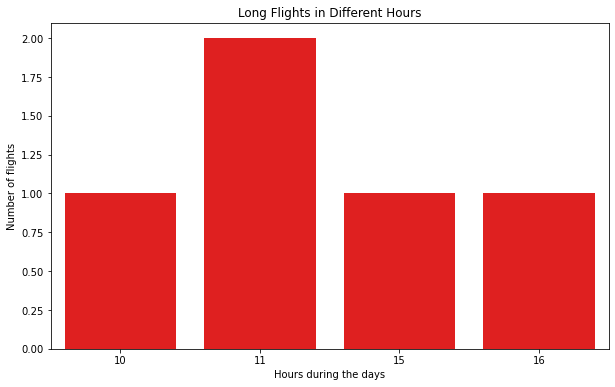

In [425]:
fig, ax=plt.subplots(figsize=(10, 6))

sns.barplot(ax=ax, x=long_time.index, y=long_time.values, color='r')
ax.set_title('Long Flights in Different Hours')
ax.set_xlabel('Hours during the days')
ax.set_ylabel('Number of flights')

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [429]:
len(df_flights)

9958

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?